<a href="https://colab.research.google.com/github/jvaragao25/explore/blob/master/ANZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_excel('ANZ.xlsx')
data

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


## FIRST TASK

##COLUMNS DESCRIPTION

**STATUS** stands for the way how the transactions happened as in authorized or posted

**CARD_PRESENT_FLAG** stands for a card not present transaction (CNP, MO/TO, Mail Order / Telephone Order, MOTOEC) is a paymentcard transaction made where the cardholder does not or cannot physically present the card for a merchant’s visual examination at the time that an order is given and payment effected

**bpay_biller_code** stands for bill payments which are might be directly through the internet, mobile or phone banking. Customer has unique BPAY Biller Code, and this feature can be used with that code and Customers’ Reference Number to pay

**account** is a unique code for each account.

**currency** which is all the transactions used as a currency. For all the dataset the currency is AUD. Thats why the currency column will not be used for further analysis.

**long_lat** stands for where the customers live as in longitudes and latitudes.

**txn_description** stands for which way the transactions occured. For example, Inter Bank, Phone Bank etc.

**merchant_id** stands for a unique code given to a business by payment processors before a merchants begin processing credit cards.

**merchant_code** stands for a four-digit number listed in ISO 18245 for retail financial services.

**first_name** stands for Customers’ first names.

**balance** stands for how much money customers’ have in their account.

**date** stands for which date the transaction occured.

**gender** is Customers’ genders.

**age** is Customers’ ages.

**merchant_suburb** stands for where the transaction occured as in suburbs.

**merchant_state** stands for where the transaction occured as in states.

**extraction** stands for when the transactions occured, the date with the time(hms)

**amount** stands for how much monet the customers spent in each transactions

**transaction_id** is a unique code for each transactions.

**country** stands for where all the transactions occured. For all dataset the country is Australia. Thats why country column will not be in the next steps.

**customer_id** is a unique code for each customers.

**merchant_long_lat** stands for where the transactions occured as in longitudes and latitudes.

**movement** stands for the type of the account as in debit or credit card.





# **UNDERSTANDING THE COLUMNS**

In [ ]:
display(data.dtypes)

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

In [ ]:
print(data.movement.unique())
print(data.country.unique())
print(data.currency.unique())
print(data.txn_description.unique())
print(data.status.unique())
print(data.card_present_flag.unique())
print(data.merchant_state.unique())

['debit' 'credit']
['Australia']
['AUD']
['POS' 'SALES-POS' 'PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']
['authorized' 'posted']
[ 1.  0. nan]
['QLD' 'NSW' nan 'VIC' 'WA' 'SA' 'NT' 'TAS' 'ACT']


# **UNDERSTANDING THE MISSING DATA**

In [ ]:
display((data.isnull().sum()).sort_values(ascending=False))

merchant_code        11160
bpay_biller_code     11158
card_present_flag     4326
merchant_state        4326
merchant_suburb       4326
merchant_id           4326
merchant_long_lat     4326
movement                 0
first_name               0
account                  0
currency                 0
long_lat                 0
txn_description          0
date                     0
balance                  0
gender                   0
age                      0
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
status                   0
dtype: int64

In [ ]:
datanull=data[(data['merchant_id'].isna()) & (data['merchant_suburb'].isna()) &(data['merchant_state'].isna())&(data['merchant_long_lat'].isna())&(data['card_present_flag'].isna())]
print(len(datanull))

4326


In [ ]:
#This shows that all the missing data are related to the same transactions
#So, we shall verify which characteristics those missing data have in common in order to understand better this relationship

In [ ]:
print(datanull.txn_description.unique())
print(datanull.status.unique())
print(datanull.movement.unique())


#Missing data --> ['PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK'] ['posted']

#Posted transactions are the purchases that have cleared on your card and the funds have been deducted ath the moment that they have been done.
#Thus, they have all the 'posted' status
#Also they do not have a merchant involved in the transaction, as they occur between common people
#This is the reason why all the missing data are related to these transactions, as the columns give the merchant's information

#Non missing data --> ['POS' 'SALES-POS'] ['authorized']

#On the other hand, POS/SALES-POS transactions are characterized by merchandizing, thus the merchant's information are not missing
#Authorized transactions are the ones still pending, and a hold is placed on your card for the purchase amount

 

['PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']
['posted']
['debit' 'credit']


# **WORKING WITH DATETIME COLUMNS**

In [ ]:
data.extraction=pd.to_datetime(data.extraction, format='%Y-%m-%d')
data.extraction

0       2018-08-01 01:01:15+00:00
1       2018-08-01 01:13:45+00:00
2       2018-08-01 01:26:15+00:00
3       2018-08-01 01:38:45+00:00
4       2018-08-01 01:51:15+00:00
                   ...           
12038   2018-10-31 23:09:06+00:00
12039   2018-10-31 23:21:46+00:00
12040   2018-10-31 23:34:25+00:00
12041   2018-10-31 23:47:05+00:00
12042   2018-10-31 23:59:44+00:00
Name: extraction, Length: 12043, dtype: datetime64[ns, UTC]

In [ ]:
#Creating Datetime columns
data['extraction_time']=data.extraction.dt.time
data['extraction_hour']=data.extraction.dt.hour
data['month']=data.date.dt.month
data['day']=data.date.dt.day
data['day_of_week']=data.date.dt.dayofweek
data['weekend']=0
data.loc[(data.day_of_week == 5) | (data.day_of_week == 6), 'weekend'] = 1

In [ ]:
data['day_of_week'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}, inplace=True)
data

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,extraction_time,extraction_hour,month,day,day_of_week,weekend
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,01:01:15,1,8,1,Wednesday,0
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,01:13:45,1,8,1,Wednesday,0
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,01:26:15,1,8,1,Wednesday,0
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,01:38:45,1,8,1,Wednesday,0
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,01:51:15,1,8,1,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31 23:09:06+00:00,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,23:09:06,23,10,31,Wednesday,0
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31 23:21:46+00:00,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,23:21:46,23,10,31,Wednesday,0
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31 23:34:25+00:00,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,23:34:25,23,10,31,Wednesday,0
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31 23:47:05+00:00,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,23:47:05,23,10,31,Wednesday,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

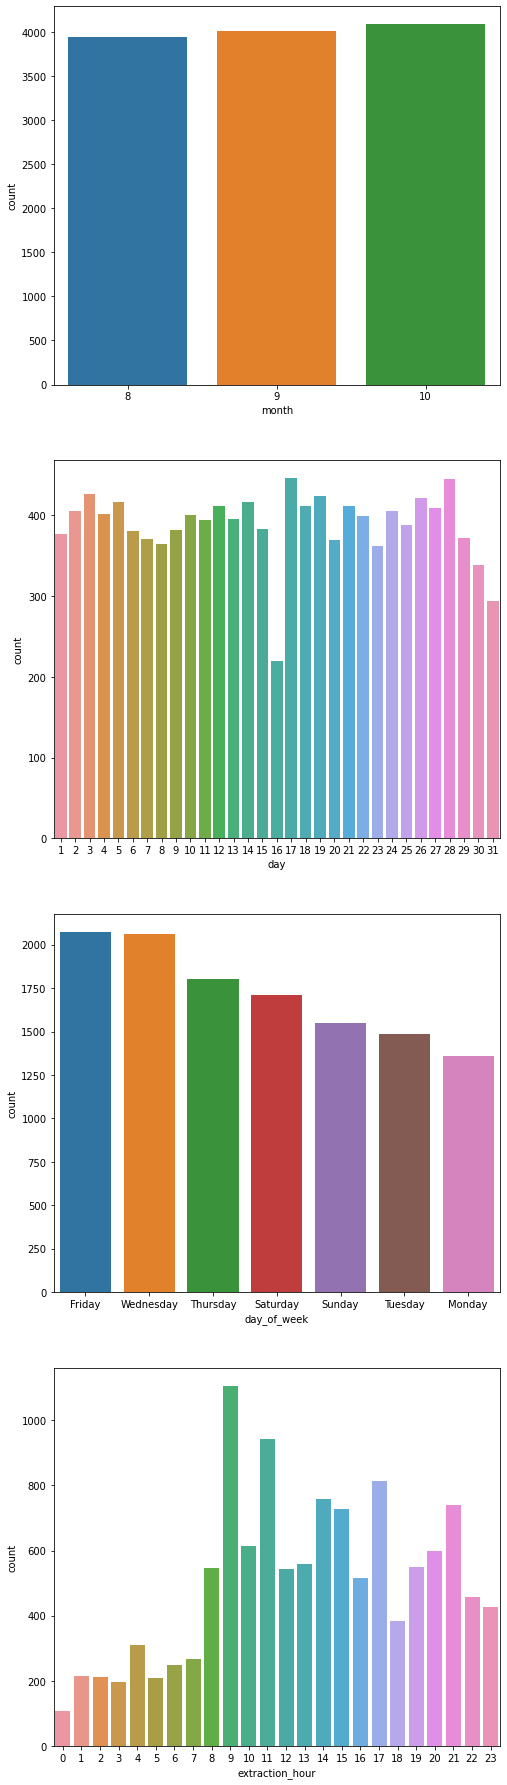

In [ ]:
#Understanding the transactions
fig, (ax5,ax6,ax7,ax8) = plt.subplots(4,1,figsize=(8,32))

sns.countplot('month', data=data, ax=ax5)
sns.countplot('day', data=data, ax=ax6)
sns.countplot('day_of_week', data=data, order=data['day_of_week'].value_counts().index, ax=ax7)
sns.countplot('extraction_hour', data=data, ax=ax8)



It cannot be seen any clear pattern between month/day and the extraction.
On the other hand, the days of week barplot shows a pattern similar to a normal distribution, where the most extraction occur on the central days of the graph (Wednesday and Friday).
Also, the extraction hour of the day may be concatened in groups such as morning, afternoon, evening and night to give us some more information

Text(0.5, 1.0, 'Transactions per Day Shift')

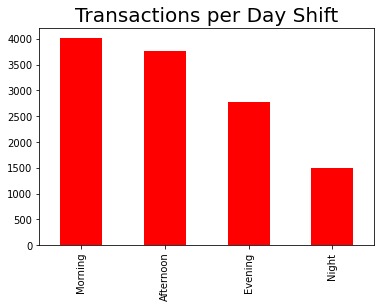

In [ ]:
turno = []
for i in data['extraction_hour']:
  if (i>6) and (i<=12):
    turno.append('Morning')
  elif (i>12) and (i<=18):
    turno.append('Afternoon')
  elif (i>18) and (i<=23):
    turno.append('Evening')
  else:
    turno.append('Night')

data['turno'] = turno
data['turno'].value_counts().plot(kind='bar', color='r')
plt.title('Transactions per Day Shift', fontsize=20)

Text(0.5, 1.0, 'Amount per Day Shift')

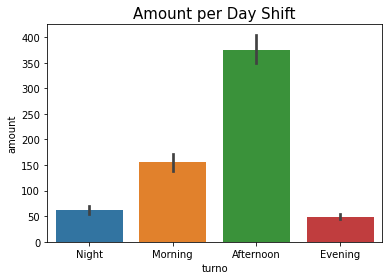

In [ ]:
sns.barplot(x='turno', y='amount', data=data)
plt.title('Amount per Day Shift', fontsize=15)

Thus, it is clear now that most of the extraction occur in the morning and in the afternoon. 
So, the system better not fail during these periods.

# TRANSACTIONS PROFILE

In [ ]:
print('Gender Percentage:\n', format(data.gender.value_counts()/len(data)));
print('States Percentage:\n',data.merchant_state.value_counts()/len(data));
print('Movement Percentage:\n',data.movement.value_counts()/len(data))
print('Top 10 accounts:\n', data.account.value_counts().head(10))

Gender Percentage:
 M    0.52188
F    0.47812
Name: gender, dtype: float64
States Percentage:
 NSW    0.180105
VIC    0.176949
QLD    0.129204
WA     0.091339
SA     0.034460
NT     0.017022
ACT    0.006062
TAS    0.005646
Name: merchant_state, dtype: float64
Movement Percentage:
 debit     0.926679
credit    0.073321
Name: movement, dtype: float64
Top 10 accounts:
 ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
ACC-3485804958    245
ACC-2673069055    239
ACC-2890243754    239
ACC-1903037542    233
ACC-3481401842    230
Name: account, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

Text(0.5, 1.0, 'Status of the Transactions')

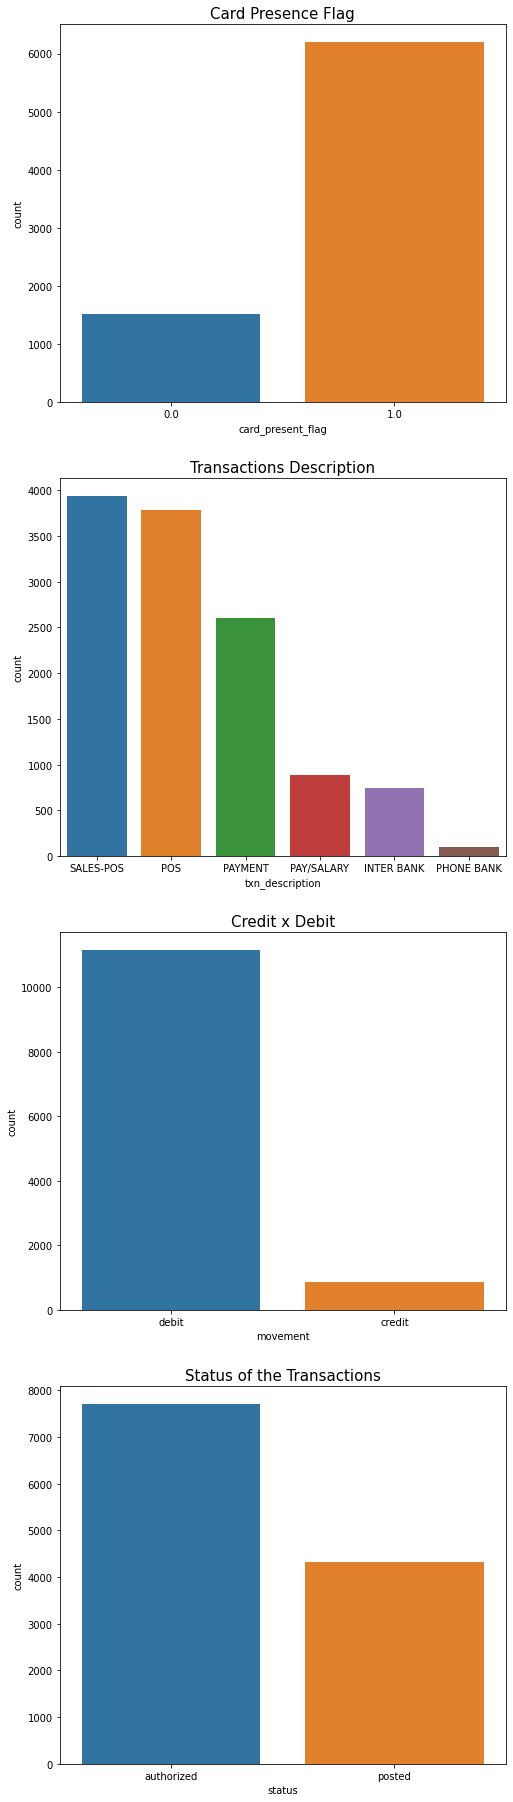

In [ ]:
fig, (ax2,ax3,ax4,ax5) = plt.subplots(4,1, figsize=(8,32));

sns.countplot('movement', data=data, ax=ax4);
ax4.set_title('Credit x Debit', fontsize=15)
#sns.countplot('merchant_state', data=data, ax=ax1, order=data['merchant_state'].value_counts().index);

sns.countplot('txn_description', data=data, ax=ax3, order=data['txn_description'].value_counts().index);
ax3.set_title('Transactions Description', fontsize=15)

sns.countplot('card_present_flag', data=data, ax=ax2);
ax2.set_title('Card Presence Flag', fontsize=15)

sns.countplot('status', data=data, ax=ax5);
ax5.set_title('Status of the Transactions', fontsize=15)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


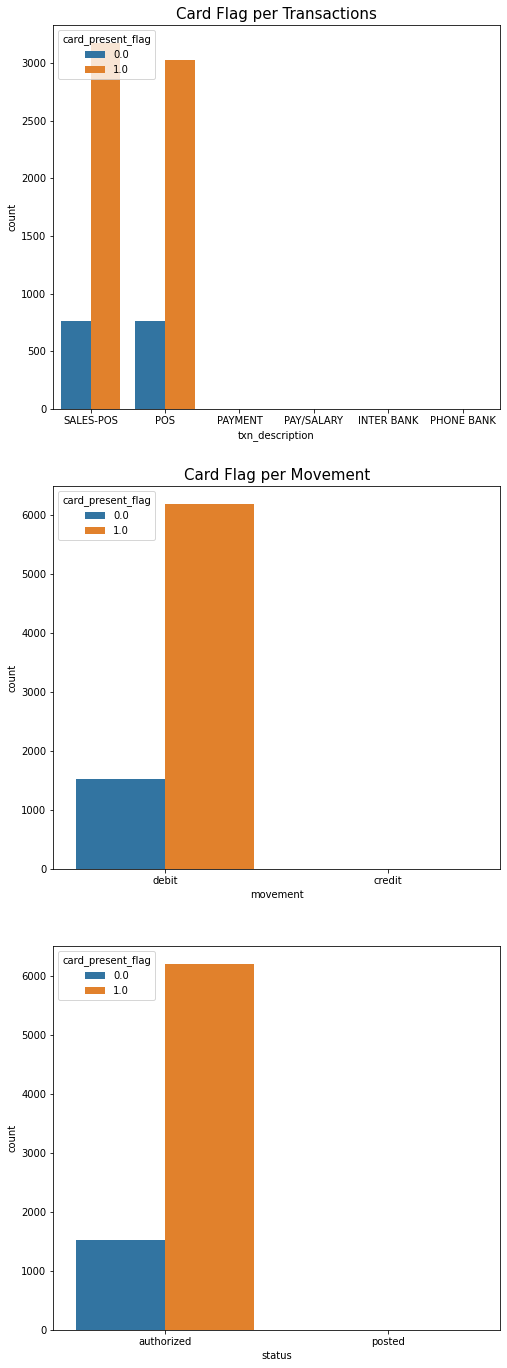

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(8,24))

sns.countplot('txn_description', data=data, ax=ax1, hue='card_present_flag', order=data['txn_description'].value_counts().index)
ax1.set_title('Card Flag per Transactions', fontsize=15)
sns.countplot('movement', hue='card_present_flag', data=data, ax=ax2)
ax2.set_title('Card Flag per Movement', fontsize=15)
sns.countplot('status', hue='card_present_flag', data=data, ax=ax3)


As it can be seen above, the transaction for which the card present flag information were given are the SALES-POS/POS, debit and authorized ones. Also, still some transactions did not need the card for the payment to be done.

Text(0.5, 1.0, 'Amount per Description')

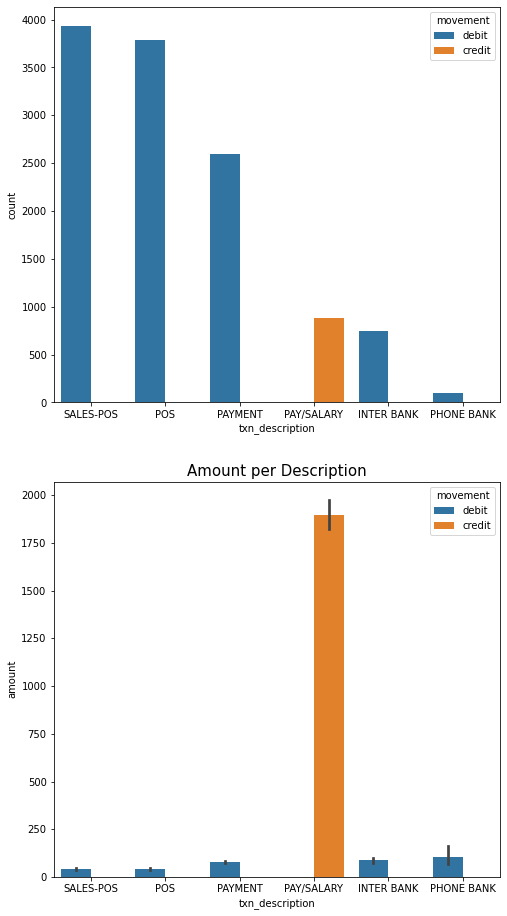

In [ ]:
#Analysing the transaction types count versus the amount of the transaction types
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,16))
sns.countplot(x='txn_description',data=data,hue='movement',order=data['txn_description'].value_counts().index, ax=ax1)
sns.barplot(x='txn_description',y='amount', data=data,hue='movement',order=data['txn_description'].value_counts().index, ax=ax2)
ax2.set_title('Amount per Description', fontsize=15)



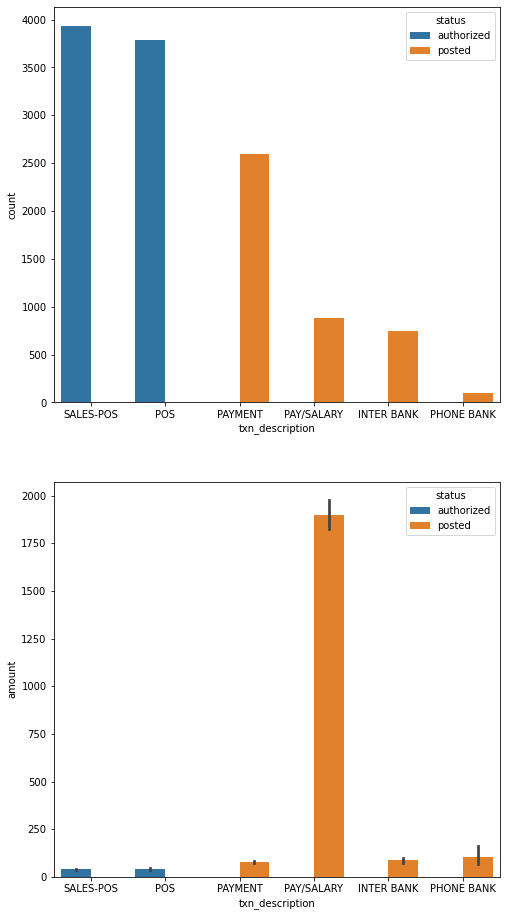

In [ ]:
#Analysing the transaction types count versus the amount of the transaction types
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,16))
sns.countplot(x='txn_description',data=data,hue='status',order=data['txn_description'].value_counts().index, ax=ax1)
sns.barplot(x='txn_description',y='amount', data=data,hue='status',order=data['txn_description'].value_counts().index, ax=ax2)

In [ ]:
data[['movement','amount']].groupby('movement').sum()/sum(data.amount)

,amount
movement,
credit,0.740772
debit,0.259228


All the credit transactions are of the type pay/salary.
And although they are not a large number among all the transactions, they are responsible for the largest amount of money moved.

In [ ]:
data[['amount','txn_description']].groupby('txn_description').describe()

amount                            ...                             
                  count         mean          std  ...       50%       75%      max
txn_description                                    ...                             
INTER BANK        742.0    86.699461   198.706044  ...    39.000    83.000  1956.00
PAY/SALARY        883.0  1898.728029  1150.364621  ...  1626.480  2538.680  8835.98
PAYMENT          2600.0    77.613077   152.310315  ...    42.500    70.000  1981.00
PHONE BANK        101.0   106.099010   245.999695  ...    43.000    67.000  1916.00
POS              3783.0    40.407412   165.771678  ...    19.430    33.155  7081.09
SALES-POS        3934.0    39.909789   132.734185  ...    20.035    34.575  4233.00

[6 rows x 8 columns]

# STATES

In [ ]:
amount_state = data.groupby('merchant_state')['amount'].sum().sort_values(ascending=True)
amount_state

merchant_state
TAS      1962.93
ACT      4876.68
NT       9168.89
SA      16776.57
WA      33992.06
QLD     53483.45
VIC     87584.00
NSW    102021.77
Name: amount, dtype: float64

In [ ]:
mean_amount_state = data.groupby('merchant_state')['amount'].mean().sort_values(ascending=False)
mean_amount_state

merchant_state
ACT    66.803836
NSW    47.036316
NT     44.726293
VIC    41.099953
SA     40.425470
QLD    34.372397
WA     30.901873
TAS    28.866618
Name: amount, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


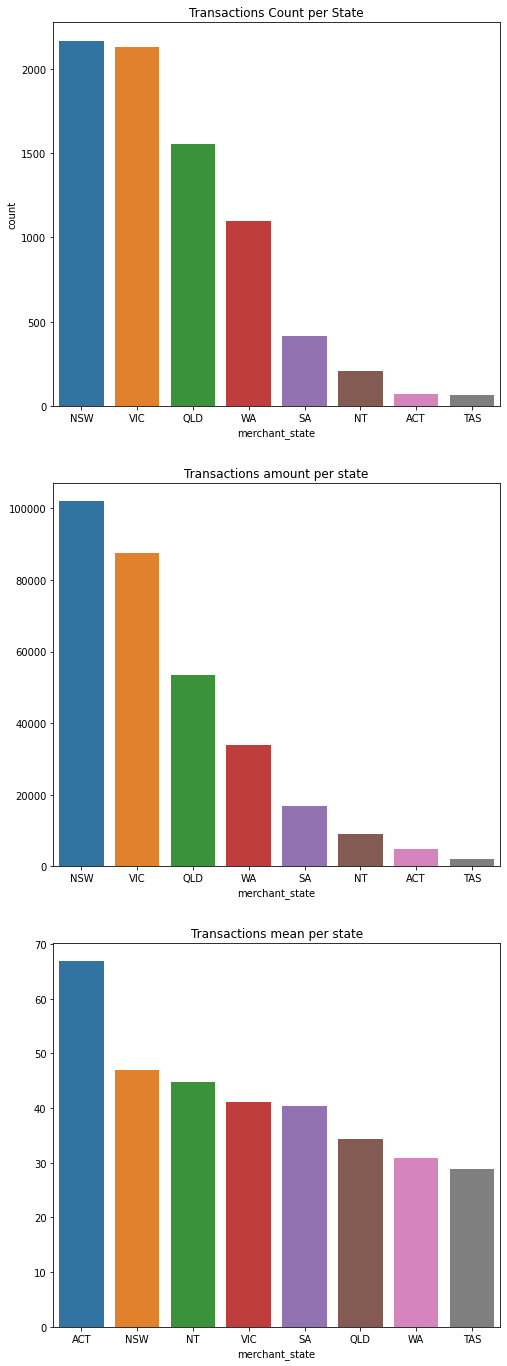

In [ ]:
sum_amount_state = data.groupby('merchant_state')['amount'].sum()
df1=pd.DataFrame(sum_amount_state)
mean_amount_state = data.groupby('merchant_state')['amount'].mean()
df2=pd.DataFrame(mean_amount_state)

fig, (ax1,ax2,ax3)=plt.subplots(3,1,figsize=(8,24))


sns.countplot('merchant_state', data=data, ax=ax1, order=data['merchant_state'].value_counts().index, )
ax1.set_title('Transactions Count per State')

sns.barplot(x=sum_amount_state.index, y=amount_state.values, ax=ax2, order=df1.sort_values('amount', ascending=False).index);
ax2.set_title('Transactions amount per state')

sns.barplot(x=mean_amount_state.index, y=mean_amount_state.values, ax=ax3, order=df2.sort_values('amount', ascending=False).index)
ax3.set_title('Transactions mean per state');


The barplots above show how most of the transactions are concentrated in 3 states such as New South Wales - where the most populated and richest city is (Sydney) -, Victoria and Queensland. 
When the mean about transacted is taken into account, the ACT assumes the highest rates, but it must be pointed to its very small number of transactions, which contributes a lot to its highest mean amount.

In [ ]:
data.merchant_state.value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [ ]:
data.groupby('merchant_state')['amount'].sum()

merchant_state
ACT      4876.68
NSW    102021.77
NT       9168.89
QLD     53483.45
SA      16776.57
TAS      1962.93
VIC     87584.00
WA      33992.06
Name: amount, dtype: float64

Text(0.5, 1.0, 'Distribution of Amount Transacted per State')

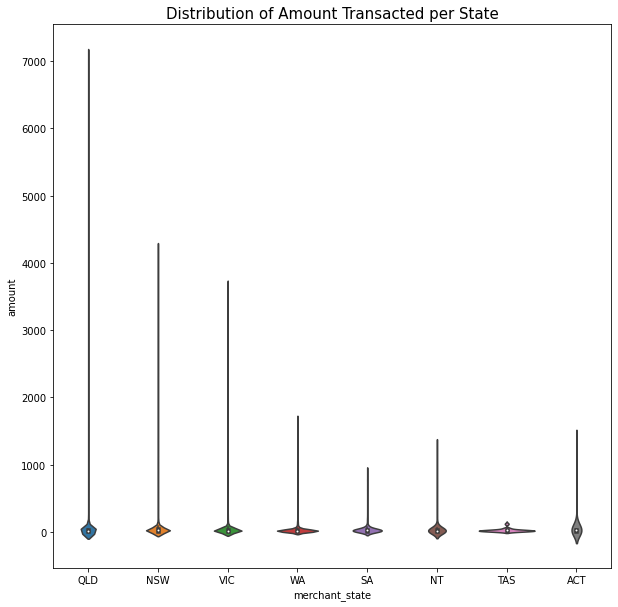

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,10))
sns.violinplot(data=data, x='merchant_state', y='amount')
plt.title('Distribution of Amount Transacted per State', fontsize=15)

In [ ]:
data[['merchant_state', 'amount']].groupby('merchant_state').describe()

amount                         ...                          
                 count       mean         std  ...     50%      75%      max
merchant_state                                 ...                          
ACT               73.0  66.803836  201.821548  ...  22.910  33.4700  1348.47
NSW             2169.0  47.036316  146.858464  ...  22.530  40.7900  4233.00
NT               205.0  44.726293  138.170485  ...  17.810  31.1200  1285.09
QLD             1556.0  34.372397  218.024779  ...  14.700  25.8800  7081.09
SA               415.0  40.425470   87.115715  ...  22.120  35.9050   909.61
TAS               68.0  28.866618   26.782770  ...  22.080  29.0700   133.31
VIC             2131.0  41.099953  130.790309  ...  21.730  35.4750  3680.71
WA              1100.0  30.901873   72.522139  ...  18.365  28.7725  1692.56

[8 rows x 8 columns]

# AGE

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count per Age')

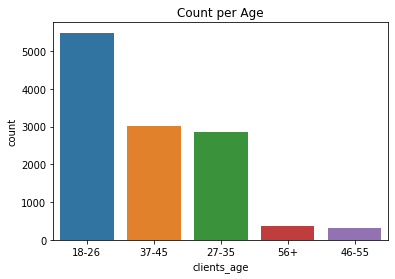

In [ ]:
clients_age = []
for i in data['age']:
  if (i>=18) and (i<=26):
    clients_age.append('18-26')
  elif (i>26) and (i<=35):
    clients_age.append('27-35')
  elif (i>36) and (i<=45):
    clients_age.append('37-45')
  elif (i>46) and (i<=55):
    clients_age.append('46-55')
  else:
    clients_age.append('56+')

data['clients_age'] = clients_age

amount_sum_AGE = data.groupby('clients_age')['amount'].sum()
df=pd.DataFrame(amount_sum_AGE)

sns.countplot('clients_age', data=data, order=data['clients_age'].value_counts().index) 
plt.title('Count per Age')


Text(0.5, 1.0, 'Sum Amount per Age')

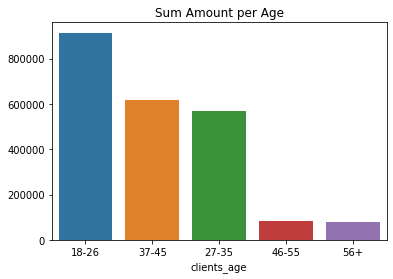

In [ ]:
amount_sum_AGE = data.groupby('clients_age')['amount'].sum()
df=pd.DataFrame(amount_sum_AGE)

sns.barplot(x=amount_sum_AGE.index, y=amount_sum_AGE.values, data=df, order=df.sort_values('amount', ascending=False).index)
plt.title('Sum Amount per Age')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Mean Amount per Age')

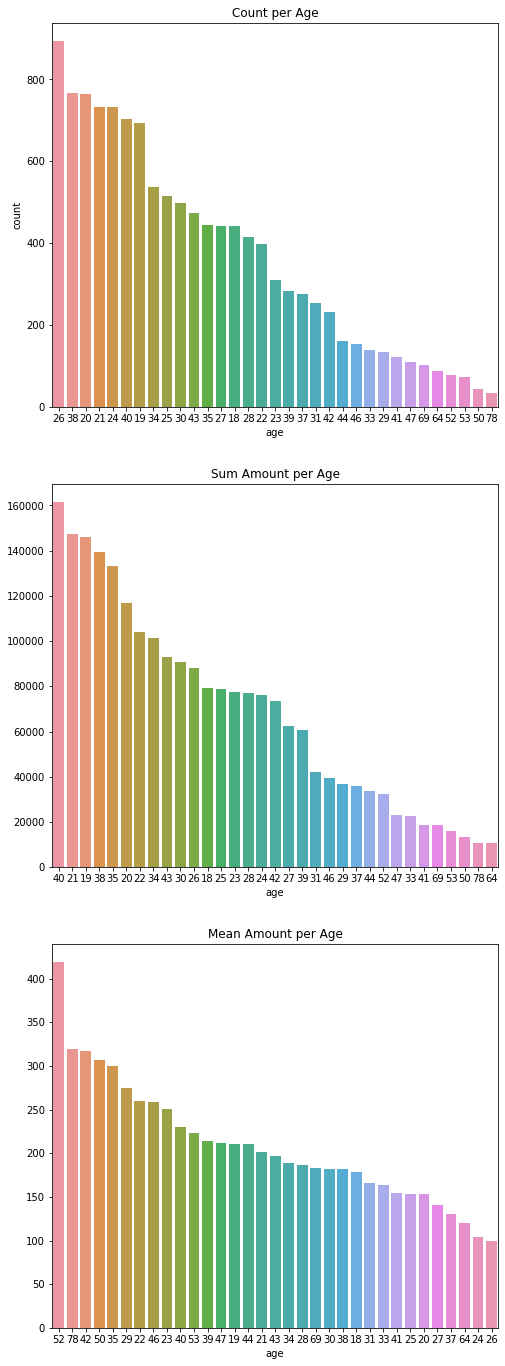

In [ ]:
amount_sum_AGE = data.groupby('age')['amount'].sum()
df=pd.DataFrame(amount_sum_AGE)

amount_mean_AGE = data.groupby('age')['amount'].mean()
df2=pd.DataFrame(amount_mean_AGE)


fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(8,24))

sns.countplot('age', data=data, ax=ax1, order=data['age'].value_counts().index) 
ax1.set_title('Count per Age')

sns.barplot(x=amount_sum_AGE.index, y=amount_sum_AGE.values, data=df, ax=ax2, order=df.sort_values('amount', ascending=False).index)
ax2.set_title('Sum Amount per Age')

sns.barplot(x=amount_mean_AGE.index, y=amount_mean_AGE.values, data=df2, ax=ax3, order=df2.sort_values('amount', ascending=False).index)
ax3.set_title('Mean Amount per Age')


Although the most common age among the ANZ users is 26 years old, the largest amount of money transacted and held onto accounts are due to 40 years old users.

In [ ]:
data[['account','age','balance']].groupby(['account','age']).sum().sort_values(by='balance',ascending=False)

,,balance
account,age,
ACC-3879258709,40,29983336.71
ACC-2014856841,46,17671502.33
ACC-1334819143,33,8547297.74
ACC-2650850707,42,7011950.25
ACC-3827517394,28,6505599.14
...,...,...
ACC-2988263882,44,216649.56
ACC-154431271,18,203503.24
ACC-3881031190,37,202533.78


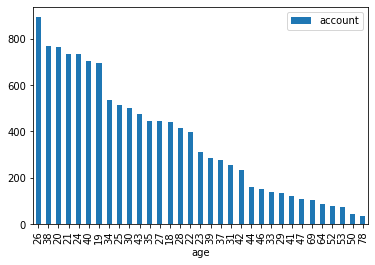

In [ ]:
data[['account','age']].groupby('age').count().sort_values(by='account',ascending=False).plot.bar()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Mean Balance per Age')

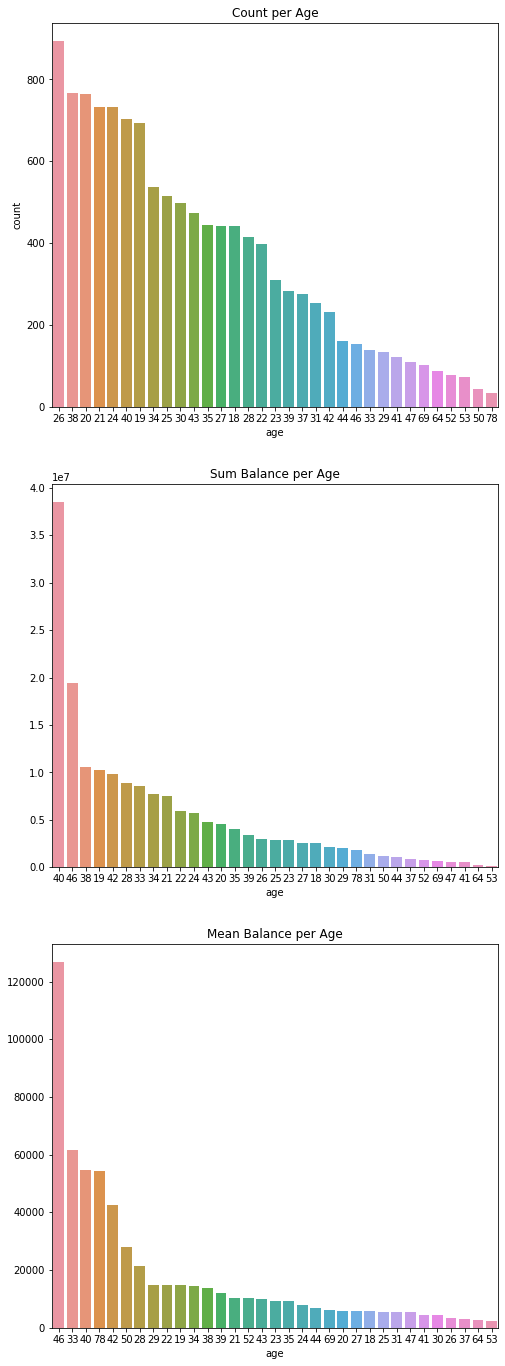

In [ ]:
balance_sum_AGE = data.groupby('age')['balance'].sum()
df=pd.DataFrame(balance_sum_AGE)

balance_mean_AGE = data.groupby('age')['balance'].mean()
df2=pd.DataFrame(balance_mean_AGE)


fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(8,24))

sns.countplot('age', data=data, ax=ax1, order=data['age'].value_counts().index) 
ax1.set_title('Count per Age')

sns.barplot(x=balance_sum_AGE.index, y=balance_sum_AGE.values, data=df, ax=ax2, order=df.sort_values('balance', ascending=False).index)
ax2.set_title('Sum Balance per Age')

sns.barplot(x=balance_mean_AGE.index, y=balance_mean_AGE.values, data=df2, ax=ax3, order=df2.sort_values('balance', ascending=False).index)
ax3.set_title('Mean Balance per Age')

When the balance is the parameter taken into account, the ages with highest numbers are between 38 and 46 years old.
Although the age of 26 occurs to be the most common among the users of ANZ bank transactions, they turn out to have one of the lowest mean balances in the dataset.

# MEN X WOMEN

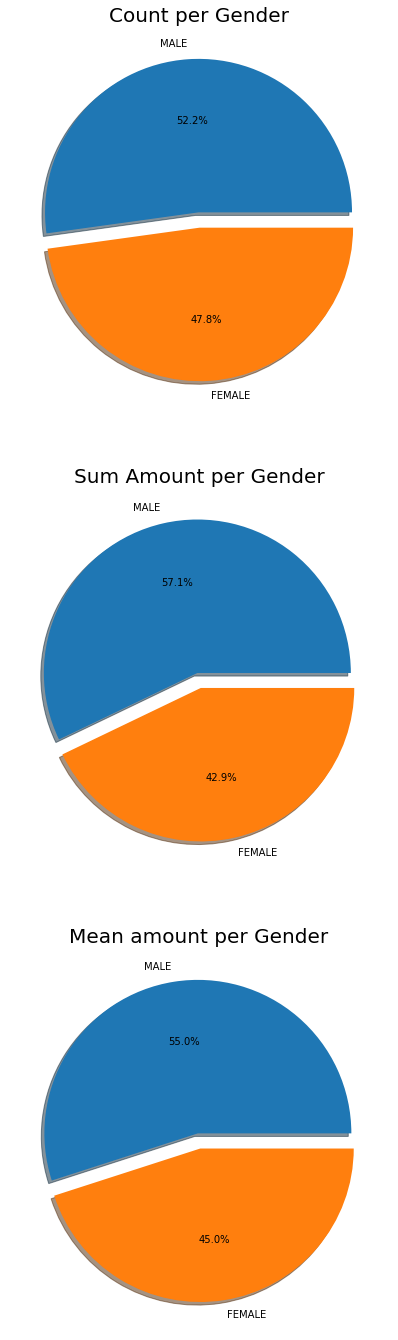

In [ ]:
#Perfil dos clientes
gender_count=data.gender.value_counts()
amount_sum_gender=data.groupby('gender')['amount'].sum().sort_values(ascending=False)
amount_mean_gender=data.groupby('gender')['amount'].mean().sort_values(ascending=False)


fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(8,24))

ax1.pie(gender_count,labels=gender_count.index.map({'M':'MALE','F':'FEMALE'}) ,autopct='%1.1f%%', shadow=True, explode=(0.05,0.05))
ax1.set_title('Count per Gender', fontsize=20)

ax2.pie(amount_sum_gender,labels=amount_sum_gender.index.map({'M':'MALE','F':'FEMALE'}) ,autopct='%1.1f%%', shadow=True, explode=(0.05,0.05))
ax2.set_title('Sum Amount per Gender', fontsize=20)

ax3.pie(amount_mean_gender, labels=amount_mean_gender.index.map({'M':'MALE','F':'FEMALE'}) ,autopct='%1.1f%%', shadow=True, explode=(0.05,0.05))
ax3.set_title('Mean amount per Gender', fontsize=20);

Even though they are in larger number when it is taken into account the number of users, men still have the highest mean amount transacted due to its much larger sum of money transacted.



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1036727ba8>],
      dtype=object)

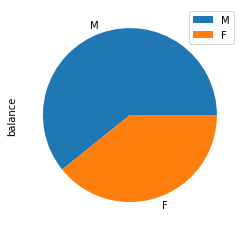

In [ ]:
#balance_sum_gender=data.groupby('gender','account')['balance'].sum().sort_values(ascending=False)
balance_sum_gender=data[['account','gender','balance']].groupby(['gender']).sum().sort_values(by='balance',ascending=False)
balance_sum_gender.plot.pie(subplots=True)


In [ ]:
data[['gender', 'amount']].groupby('gender').describe()

amount                                                            
         count        mean         std  min    25%    50%     75%      max
gender                                                                    
F       5758.0  168.517303  525.177524  0.1  15.32  27.58  51.385  7081.09
M       6285.0  205.721809  647.774391  0.1  16.68  30.00  55.780  8835.98

In [ ]:
data[['gender', 'balance']].groupby('gender').describe()

balance                              ...                                 
         count          mean           std  ...       50%         75%        max
gender                                      ...                                 
F       5758.0  12061.260431  31318.937221  ...  4882.965   8990.1875  208926.10
M       6285.0  17125.519410  31480.366558  ...  7967.460  15658.1100  267128.52

[2 rows x 8 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


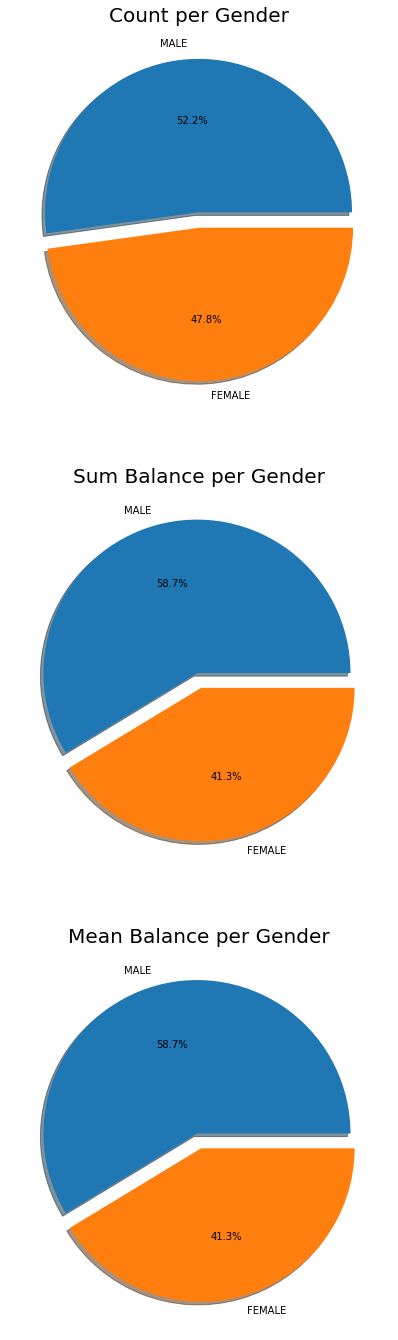

In [ ]:
#Perfil dos clientes
gender_count=data.gender.value_counts()
balance_sum_gender=data[['account','gender','balance']].groupby(['gender']).sum().sort_values(by='balance',ascending=False)
balance_sum_gender=data[['account','gender','balance']].groupby(['gender']).mean().sort_values(by='balance',ascending=False)


fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(8,24))

ax1.pie(gender_count,labels=gender_count.index.map({'M':'MALE','F':'FEMALE'}) ,autopct='%1.1f%%', shadow=True, explode=(0.05,0.05))
ax1.set_title('Count per Gender', fontsize=20)

ax2.pie(balance_sum_gender,labels=balance_sum_gender.index.map({'M':'MALE','F':'FEMALE'}) ,autopct='%1.1f%%', shadow=True, explode=(0.05,0.05))
ax2.set_title('Sum Balance per Gender', fontsize=20)

ax3.pie(balance_mean_gender, labels=balance_mean_gender.index.map({'M':'MALE','F':'FEMALE'}) ,autopct='%1.1f%%', shadow=True, explode=(0.05,0.05))
ax3.set_title('Mean Balance per Gender', fontsize=20);

As it can be seen in the pie charts above, the balances also are higher for male than female.

# CLIENTS

In [ ]:
len(data.account.unique())

100

There are transactions of only 100 different users.

In [ ]:
#Number of transactions each account has done
data.account.value_counts().head(15)

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
ACC-3485804958    245
ACC-2890243754    239
ACC-2673069055    239
ACC-1903037542    233
ACC-3481401842    230
ACC-3689607373    199
ACC-1710017148    178
ACC-958000567     174
ACC-2249586092    170
ACC-854938045     169
Name: account, dtype: int64

In [ ]:
#15 largest amounts transactioned per name (not necessarily same person)
data[['first_name','account','amount','txn_description']].groupby(['first_name','account']).sum().sort_values(by=['amount'],ascending=False).head(15)#/sum(data.amount)


,,amount
first_name,account,
Kenneth,ACC-3317636250,45409.16
Ricky,ACC-1496451953,42688.30
Tim,ACC-1523339231,40215.54
Linda,ACC-2231965366,37943.79
Kenneth,ACC-240804743,36786.13
Michelle,ACC-1710017148,36639.41
Sandra,ACC-958000567,36588.25
Natasha,ACC-3879258709,36543.61
Jessica,ACC-3485804958,36050.72


In [ ]:
#TOP15 highest balances
data[['first_name','balance','account']].groupby(['account']).mean().sort_values(by='balance', ascending=False).head(20)

,balance
account,
ACC-2014856841,263753.766119
ACC-3879258709,198565.143775
ACC-2650850707,111300.797619
ACC-1523339231,65420.404231
ACC-1334819143,61491.350647
ACC-4059612845,57566.579032
ACC-847145727,56685.795802
ACC-721712940,54240.641471
ACC-1056639002,46338.733837


#SALARY X SPENDING

In [ ]:
print('Which gender earns more (salary)?')
print(data[data['txn_description']=='PAY/SALARY'].groupby('gender')['amount'].sum())
print('Which gender spends more?')
print(data[data['txn_description']!='PAY/SALARY'].groupby('gender')['amount'].sum())

Which gender earns more (salary)?
gender
F    703656.23
M    972920.62
Name: amount, dtype: float64
Which gender spends more?
gender
F    266666.40
M    320040.95
Name: amount, dtype: float64


In [ ]:
#Salaries
salaries=data[data['txn_description']=='PAY/SALARY'].groupby('customer_id')['amount'].sum()
salaries.sort_values(ascending=False)

customer_id
CUS-1816693151    35343.92
CUS-3142625864    33644.13
CUS-2738291516    33081.88
CUS-2155701614    31762.12
CUS-261674136     30837.10
                    ...   
CUS-72755508       8703.84
CUS-3255104878     8637.59
CUS-880898248      8603.88
CUS-1654129794     7488.00
CUS-1233833708     7155.96
Name: amount, Length: 100, dtype: float64

Text(0.5, 1.0, 'Total Salary Histogram')

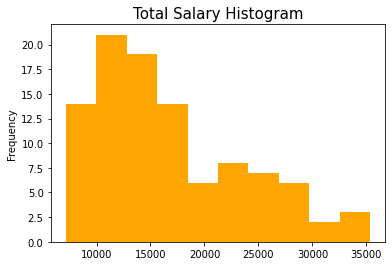

In [ ]:
#Salary distribution
salaries.plot.hist(color='orange')
plt.title('Total Salary Histogram', fontsize=15)

In [ ]:
#Spendings
spendings=data[data['txn_description']!='PAY/SALARY'].groupby('customer_id')['amount'].sum()
spendings.sort_values(ascending=False)

customer_id
CUS-1271030853    12865.68
CUS-2738291516    12327.28
CUS-51506836      12051.77
CUS-2487424745    12020.21
CUS-4142663097    11964.98
                    ...   
CUS-1842679196     2540.76
CUS-326006476      1920.93
CUS-2110742437     1537.44
CUS-1646183815     1456.21
CUS-1739931018      925.48
Name: amount, Length: 100, dtype: float64

Text(0.5, 1.0, 'Total Spending Histogram')

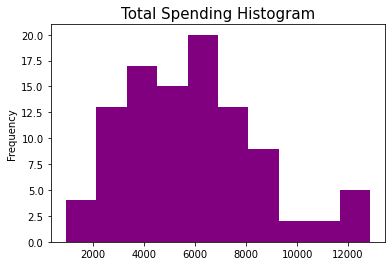

In [ ]:
spendings.plot.hist(color='purple')
plt.title('Total Spending Histogram', fontsize=15)

In [ ]:
#Criando dataframe de salary x spendigs
data2=pd.DataFrame(salaries)
data3=pd.DataFrame(spendings)
for i in (data2.index):
  for n in (data3.index):
    if n == i:
      data2['spendings']=data3['amount']
data2.rename(columns={'amount':'salary'}, inplace=True)
data2

,salary,spendings
customer_id,,
CUS-1005756958,12616.11,3652.86
CUS-1117979751,25050.55,8933.82
CUS-1140341822,11499.06,5511.54
CUS-1147642491,22248.07,6732.75
CUS-1196156254,27326.11,8724.61
...,...,...
CUS-72755508,8703.84,2734.53
CUS-809013380,13481.91,5328.18
CUS-860700529,10851.72,7248.16


In [ ]:
data2['balance']=data2['salary']-data2['spendings']
data2

,salary,spendings,balance
customer_id,,,
CUS-1005756958,12616.11,3652.86,8963.25
CUS-1117979751,25050.55,8933.82,16116.73
CUS-1140341822,11499.06,5511.54,5987.52
CUS-1147642491,22248.07,6732.75,15515.32
CUS-1196156254,27326.11,8724.61,18601.50
...,...,...,...
CUS-72755508,8703.84,2734.53,5969.31
CUS-809013380,13481.91,5328.18,8153.73
CUS-860700529,10851.72,7248.16,3603.56


Text(0.5, 1.0, 'Estimated Balance Histogram')

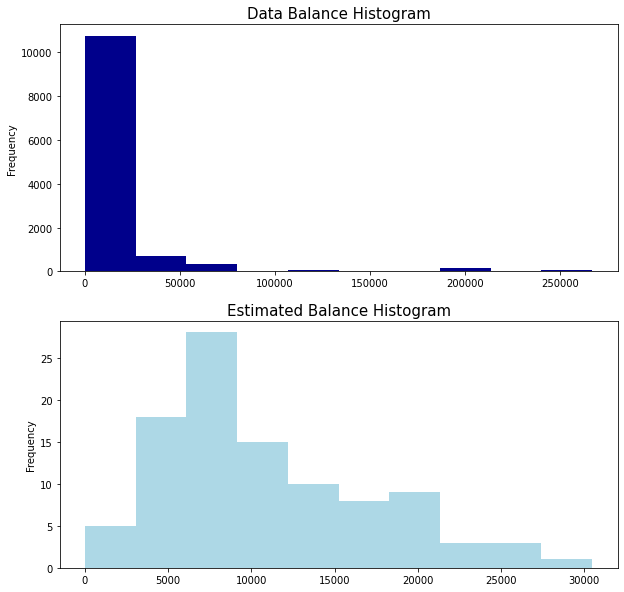

In [ ]:
#Comparing the histograms of the balance calculated and the balance given
fig,(ax,ax1)=plt.subplots(2,figsize=(10,10))
data.balance.plot.hist(ax=ax, color='darkblue')
ax.set_title('Data Balance Histogram', fontsize=15)
data2.balance.plot.hist(ax=ax1, color='lightblue')
ax1.set_title('Estimated Balance Histogram', fontsize=15)

The discrepancy between the balances calculated and given in the dataset is due to the fact that the former takes into account only the salaries received and the spendings of the 3 months when the data was collected, while the latter has old incomes amongst. It is as if the second histogram represents the interval 0-50000 of the first one.

In [ ]:
data.amount.describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

In [ ]:
data.balance.describe()

count     12043.000000
mean      14704.195553
std       31503.722652
min           0.240000
25%        3158.585000
50%        6432.010000
75%       12465.945000
max      267128.520000
Name: balance, dtype: float64

So, it can be seen that none of the overall balances are negative, due to past income present in the account, however, when it is analysed only the three months of the collected data, there is one account where the spendings are greater than the salary.

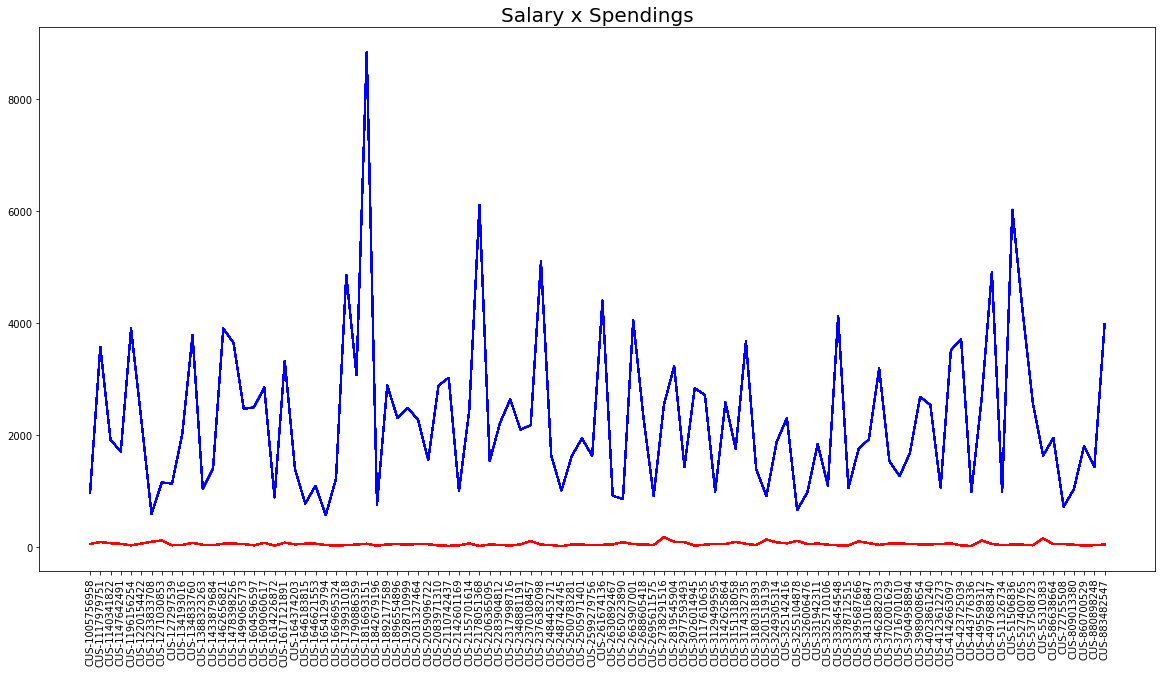

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))
for n in data2.index:
  ax.plot(data2.index, data2['salary'], label='salary', color='b')
  ax.plot(data2.index, data2['spendings'], label='spending', color='r')
  #ax.bar(x=data2.index, height= data2['balance'], label='balance', color='yellowgreen')
  ax.set_title('Salary x Spendings', fontsize=20)
  ax.tick_params(axis='x', rotation=90)

#sns.barplot(x=data2.index, y=data2['balance'], data=data2, ax=ax, palette='seagreen')

As it can be seen in the lineplot above, no account has spent more than it earns in salary, which points for superavitable balances for all these users.

In [ ]:
salaries2=data[data['txn_description']=='PAY/SALARY'].groupby('customer_id')['amount'].sum()
spendings2=data[data['txn_description']!='PAY/SALARY'].groupby('customer_id')['amount'].sum()
data2=pd.DataFrame(salaries2)
data3=pd.DataFrame(spendings2)
for i in (data2.index):
  for n in (data3.index):
    if n == i:
      data2['spendings']=data3['amount']
data2.rename(columns={'amount':'salary'}, inplace=True)
data2['balance']=data2['salary']-data2['spendings']


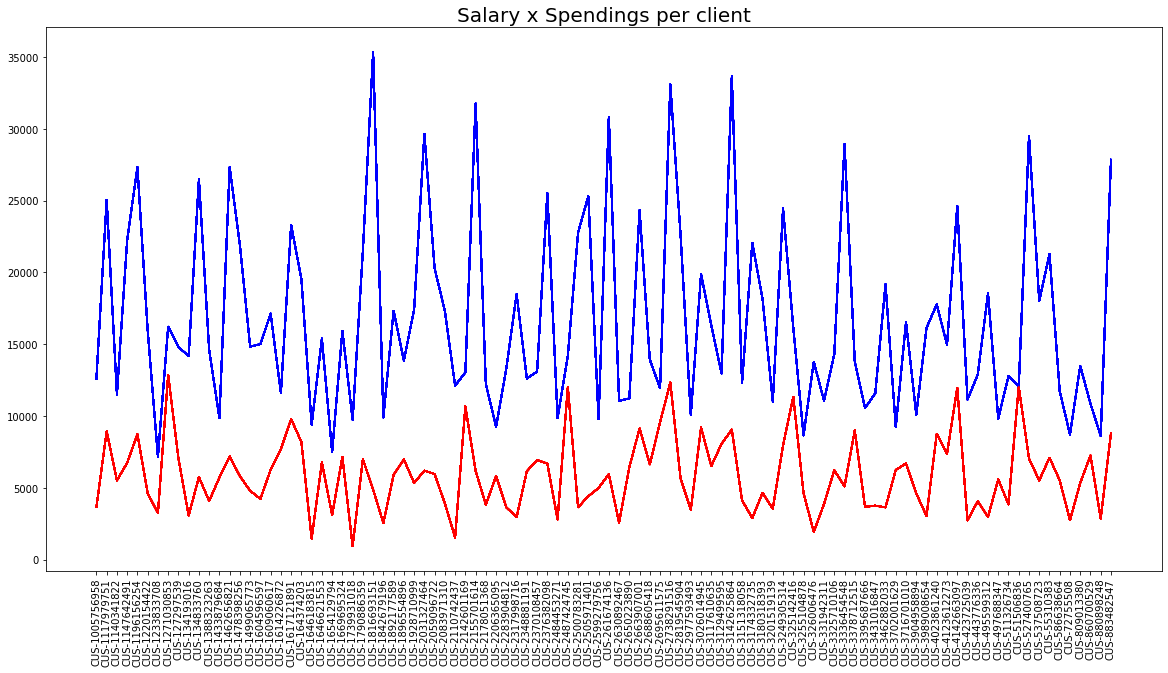

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))
for n in data2.index:
  ax.plot(data2.index, data2['salary'], label='salary', color='b')
  ax.plot(data2.index, data2['spendings'], label='spending', color='r')
  #ax.bar(x=data2.index, height= data2['balance'], label='balance', color='yellowgreen')
  ax.set_title('Salary x Spendings per client', fontsize=20)
  ax.tick_params(axis='x', rotation=90)

# DAY OF WEEK

Text(0.5, 1.0, 'Transactions per Day of Week')

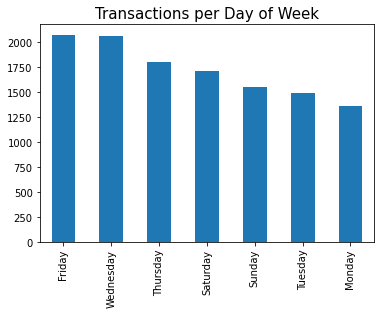

In [ ]:
data.day_of_week.value_counts().plot.bar()
plt.title('Transactions per Day of Week', fontsize=15)

In [ ]:
data.loc[data['day_of_week']]

In [ ]:
data[['amount','day_of_week']].groupby('day_of_week').sum().sort_values(by=['amount'], ascending=False)

,amount
day_of_week,
Friday,516909.84
Monday,507580.56
Wednesday,402729.72
Thursday,331402.77
Tuesday,329484.19
Saturday,93002.56
Sunday,82174.56


Text(0.5, 1.0, 'Sum amount per day of week')

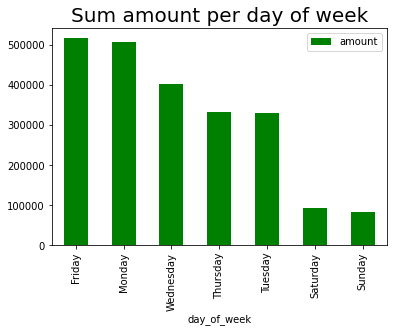

In [ ]:
data[['day_of_week','amount']].groupby('day_of_week').sum().sort_values(by=['amount'], ascending=False).plot.bar(color='g');
plt.title('Sum amount per day of week', fontsize=20)

The days in which the largest amount of money are transacted are Monday and Friday, coincidently the days which start the week and the weekend respectively.


In [ ]:
data[['day_of_week','amount']].groupby('day_of_week').mean().sort_values(by=['amount'], ascending=False)

,amount
day_of_week,
Monday,373.221000
Friday,249.353517
Tuesday,221.576456
Wednesday,195.215570
Thursday,184.010422
Saturday,54.419286
Sunday,53.015845


Text(0.5, 1.0, 'Mean amount per day of week')

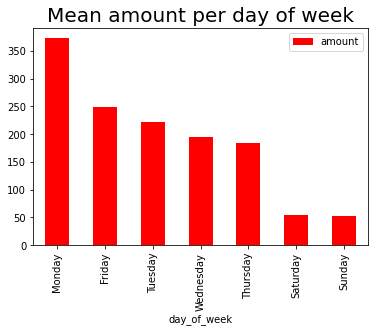

In [ ]:
data[['day_of_week','amount']].groupby('day_of_week').mean().sort_values(by=['amount'], ascending=False).plot.bar(color='r')
plt.title('Mean amount per day of week', fontsize=20)

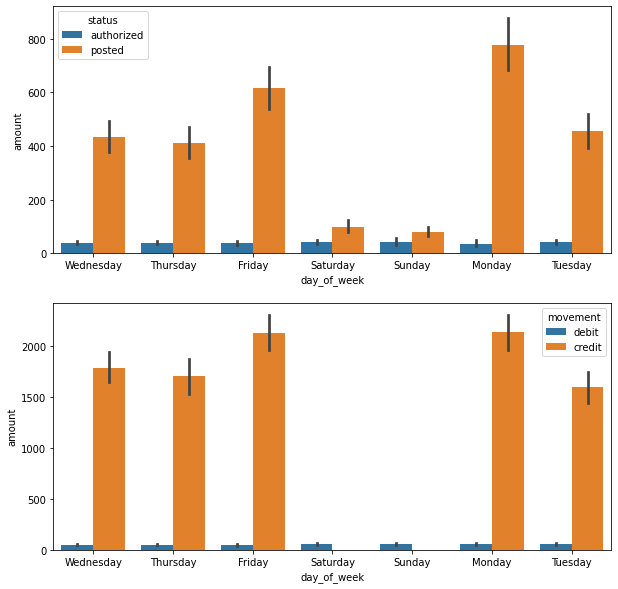

In [ ]:
fig,(ax,ax1) = plt.subplots(2,figsize=(10,10))
sns.barplot(x='day_of_week', y='amount', hue='status', data=data, ax=ax)
sns.barplot(x='day_of_week', y='amount', hue='movement', data=data, ax=ax1)

# LOCATION

In [ ]:
print(len(data.merchant_long_lat.unique()))

print(len(data['merchant_long_lat'].dropna()))

print(len(data.long_lat.unique()))

2704
7717
100


In [ ]:
data.merchant_suburb.value_counts().head(20)

Melbourne        255
Sydney           233
Southport         82
Brisbane City     79
Chatswood         55
Perth             45
Adelaide          44
Mount Gambier     41
Broadbeach        41
Parramatta        39
North Sydney      37
Broken Hill       36
Ringwood          35
Richmond          35
Darwin City       35
Castlemaine       33
Ceduna            33
Robina            33
Nowra             33
Brookvale         32
Name: merchant_suburb, dtype: int64

In [ ]:
dt=data[['merchant_suburb', 'amount']].groupby('merchant_suburb').sum().sort_values(by='amount', ascending=False)
dt.head(15)


,amount
merchant_suburb,
Sydney,21675.44
Melbourne,11943.53
South Brisbane,11740.58
Mascot,10282.62
Mount Gambier,4710.25
Malvern,3994.83
Maribyrnong,3770.83
Parap,3323.51
Brisbane City,2724.45


In [ ]:
data.long_lat[2].split(sep=' ')[1]

'-33.94'

In [ ]:
longi=[]
lat=[]

for i in data['long_lat']:
  longi.append(float(i.split(sep=' ')[0]))
  lat.append(float(i.split(sep=' ')[1]))
data['long']=longi
data['lat']=lat


In [ ]:
data.lat.unique()

array([ -27.95,  -33.94,  -27.66,  -33.87,  -37.76,  -32.  ,  -33.96,
        -36.04,  -33.76,  -37.84,  -27.61,  -37.9 ,  -34.97,  -32.28,
        -37.74,  -27.93,  -31.72,  -38.03,  -37.97,  -33.8 ,  -33.77,
        -34.01,  -27.49,  -35.01,  -17.03,  -28.8 ,  -27.48,  -31.79,
        -37.82,  -33.79,  -37.88,  -37.58,  -33.78,  -34.86, -573.  ,
        -37.81,  -37.06,  -37.7 ,  -37.83,  -37.93,  -37.66,  -32.07,
        -33.89,  -12.37,  -34.89,  -33.9 ,  -37.85,  -31.9 ,  -12.45,
        -37.91,  -37.73,  -31.82,  -12.49,  -22.84,  -33.64,  -31.88,
        -32.98,  -36.07,  -37.42,  -21.15,  -37.79,  -37.92,  -34.37,
        -28.01,  -29.47,  -35.27,  -34.93,  -31.92,  -27.51,  -37.95,
        -42.88,  -34.84,  -37.86,  -33.99,  -37.69,  -31.94,  -33.91,
        -33.93,  -23.4 ,  -33.85,  -31.87,  -34.96,  -23.52,  -35.25,
        -30.75])

In [ ]:
data[['long_lat','amount']].groupby('long_lat').count().sort_values(by='amount',ascending=False)

,amount
long_lat,
153.41 -27.95,578
151.23 -33.94,303
116.06 -32.00,292
145.45 -37.74,260
153.10 -27.66,259
...,...
149.03 -35.25,40
149.19 -21.15,37
145.09 -37.82,34


In [ ]:
long=data.long
new_long=[]
for i in long:
  i=str(i)
  a=i.split(sep='.')[0]
  new_long.append(a)
data['long']=new_long

In [ ]:
lat=data.lat
new_lat=[]
for i in lat:
  i=str(i)
  a=i.split(sep='.')[0]
  new_lat.append(a)
data['lat']=new_lat

In [ ]:
print('Latitudes')
print(data.lat.value_counts())
print('Longitudes')
print(data.long.value_counts())

Latitudes
-37     3449
-33     2097
-27     1798
-31     1020
-34      842
-32      696
-12      368
-35      343
-28      269
-36      215
-22      169
-17      148
-23      138
-30      134
-573     123
-42       88
-29       57
-38       52
-21       37
Name: lat, dtype: int64
Longitudes
145    1919
153    1704
151    1678
144    1187
115    1145
150     905
138     798
116     447
147     434
130     368
143     242
152     239
146     215
149     194
121     134
114     124
142     124
255     123
148      63
Name: long, dtype: int64


In [ ]:
data

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,extraction_time,extraction_hour,month,day,day_of_week,weekend,turno,long,lat
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,01:01:15,1,8,1,Wednesday,0,Night,153,-27
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,01:13:45,1,8,1,Wednesday,0,Night,153,-27
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,01:26:15,1,8,1,Wednesday,0,Night,151,-33
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,01:38:45,1,8,1,Wednesday,0,Night,153,-27
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,01:51:15,1,8,1,Wednesday,0,Night,153,-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31 23:09:06+00:00,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,23:09:06,23,10,31,Wednesday,0,Evening,149,-29
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31 23:21:46+00:00,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,23:21:46,23,10,31,Wednesday,0,Evening,151,-33
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31 23:34:25+00:00,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,23:34:25,23,10,31,Wednesday,0,Evening,151,-33
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31 23:47:05+00:00,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,23:47:05,23,10,31,Wednesday,0,Evening,144,-37


In [ ]:
data.loc[data['long']==153.41]

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,extraction_time,extraction_hour,month,day,day_of_week,weekend,turno,long,lat
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,01:01:15,1,8,1,Wednesday,0,Night,153.41,-27.95
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,01:13:45,1,8,1,Wednesday,0,Night,153.41,-27.95
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,01:51:15,1,8,1,Wednesday,0,Night,153.41,-27.95
20,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,f2ef6270-cf91-409f-a6a2-fbd6735ea500,NaN,Diana,3.85,2018-08-01,F,26,Byron Bay,NSW,2018-08-01 08:09:42+00:00,14.10,1c12c9ad77894ef8b507fb091e41e928,Australia,CUS-2487424745,153.6 -28.63,debit,08:09:42,8,8,1,Wednesday,0,Morning,153.41,-27.95
72,posted,NaN,0,ACC-1598451071,AUD,153.41 -27.95,PAY/SALARY,NaN,0.0,Diana,1017.52,2018-08-01,F,26,NaN,NaN,2018-08-01 14:00:00+00:00,1013.67,a72c9dd8b4614a1982ff71f8b62677ad,Australia,CUS-2487424745,NaN,credit,14:00:00,14,8,1,Wednesday,0,Afternoon,153.41,-27.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11990,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,e4758c3b-e8d8-49bd-990a-a823a86dcabc,NaN,Diana,2236.44,2018-10-31,F,26,Mudgeeraba,QLD,2018-10-31 15:38:20+00:00,24.37,78fe3dcf051e47f88767ac7f4bb63f1b,Australia,CUS-2487424745,153.36 -28.07,debit,15:38:20,15,10,31,Wednesday,0,Afternoon,153.41,-27.95
12013,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,a074e4af-d785-465d-a813-4701cc355c78,NaN,Diana,2220.14,2018-10-31,F,26,Brisbane City,QLD,2018-10-31 18:42:46+00:00,16.30,db9aa7f3f1e44c6997376691b3d8d733,Australia,CUS-2487424745,153.02 -27.47,debit,18:42:46,18,10,31,Wednesday,0,Afternoon,153.41,-27.95
12015,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,e4758c3b-e8d8-49bd-990a-a823a86dcabc,NaN,Diana,2194.26,2018-10-31,F,26,Mudgeeraba,QLD,2018-10-31 19:04:59+00:00,25.88,bb90a98fdcbd40a69ad40a4fcd3971f6,Australia,CUS-2487424745,153.36 -28.07,debit,19:04:59,19,10,31,Wednesday,0,Evening,153.41,-27.95
12017,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,f951df7c-92b7-444c-959b-e227f5bb6735,NaN,Diana,2148.06,2018-10-31,F,26,Lidcombe,NSW,2018-10-31 19:31:18+00:00,46.20,362ee085d8794e1088f9906cde2aaa15,Australia,CUS-2487424745,151.05 -33.85,debit,19:31:18,19,10,31,Wednesday,0,Evening,153.41,-27.95


In [ ]:
data

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,long,lat
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,149.83,-29.47
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,151.22,-33.87
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,151.12,-33.89
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,144.96,-37.76


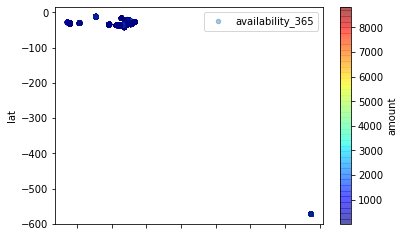

In [ ]:
viz_4=data[['long','lat','amount']].plot(kind='scatter', x='long', y='lat', label='availability_365', c='amount',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4)
viz_4.legend()

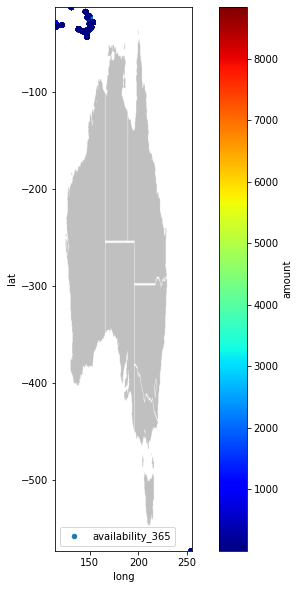

In [ ]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,10))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/3/32/Australia-blank-locator.png')
aus_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(aus_img, zorder=0,extent=[data.long.min(), data.long.max(),data.lat.min(), data.lat.max()])
ax=plt.gca()
#using scatterplot again
data[['long','lat','amount']].plot(kind='scatter', x='long', y='lat', label='availability_365', c='amount', ax=ax,
                                   cmap=plt.get_cmap('jet'), colorbar=True, zorder=5)

plt.legend()
plt.show()

# VALUE SPENT

In [ ]:
data.groupby('merchant_state')['amount']

Text(0.5, 1.0, 'Distribution of Amount Transacted per State')

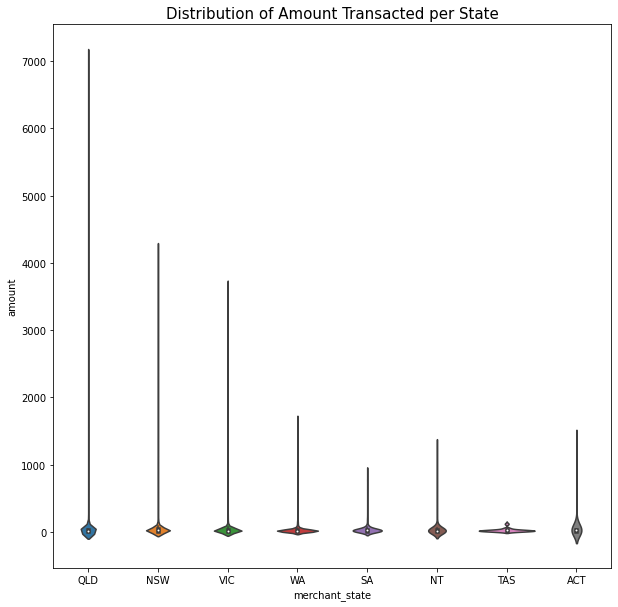

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,10))
sns.violinplot(data=data, x='merchant_state', y='amount')
plt.title('Distribution of Amount Transacted per State', fontsize=15)

In [ ]:
data.amount.describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

In [ ]:
data.balance.describe()

count     12043.000000
mean      14704.195553
std       31503.722652
min           0.240000
25%        3158.585000
50%        6432.010000
75%       12465.945000
max      267128.520000
Name: balance, dtype: float64

# SECOND TASK

In [ ]:
print(data[data['txn_description']=='PAY/SALARY'].groupby('account')['amount'].count().sort_values(ascending=False).head(10))
print(data[data['txn_description']=='PAY/SALARY'].groupby('age')['amount'].count().sort_values(ascending=False).head(10))
print(data[data['txn_description']=='PAY/SALARY'].groupby('gender')['amount'].count().sort_values(ascending=False).head(10))
print(data[data['txn_description']=='PAY/SALARY'].groupby('day_of_week')['amount'].count().sort_values(ascending=False).head(10))

account
ACC-1973887809    14
ACC-1598451071    14
ACC-2920611728    14
ACC-3326339947    14
ACC-1799207998    14
ACC-1650504218    14
ACC-2776252858    14
ACC-819621312     14
ACC-1443681913    13
ACC-3317636250    13
Name: amount, dtype: int64
age
35    57
20    56
21    54
26    52
38    51
40    50
19    46
43    46
22    39
30    35
Name: amount, dtype: int64
gender
M    464
F    419
Name: amount, dtype: int64
day_of_week
Monday       207
Friday       201
Wednesday    172
Tuesday      160
Thursday     143
Name: amount, dtype: int64
